<a href="https://colab.research.google.com/github/mohammedafaaz/mohammedafaaz/blob/main/Yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun May 11 16:18:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 21.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 5.08MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.8ms
Speed: 0.6ms pre-process, 15.8ms inference, 48.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [8]:
!ls


Pothole.v1-raw.yolov8  Yolov8_object_detection_on_custom_dataset.ipynb


In [9]:
%cd /content/drive/MyDrive/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=665 plots=True

/content/drive/MyDrive/YOLOv8
100% 21.5M/21.5M [00:00<00:00, 243MB/s]
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=665, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

In [10]:
!ls runs/detect/train/

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1200.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch1201.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch1202.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch1.jpg     weights


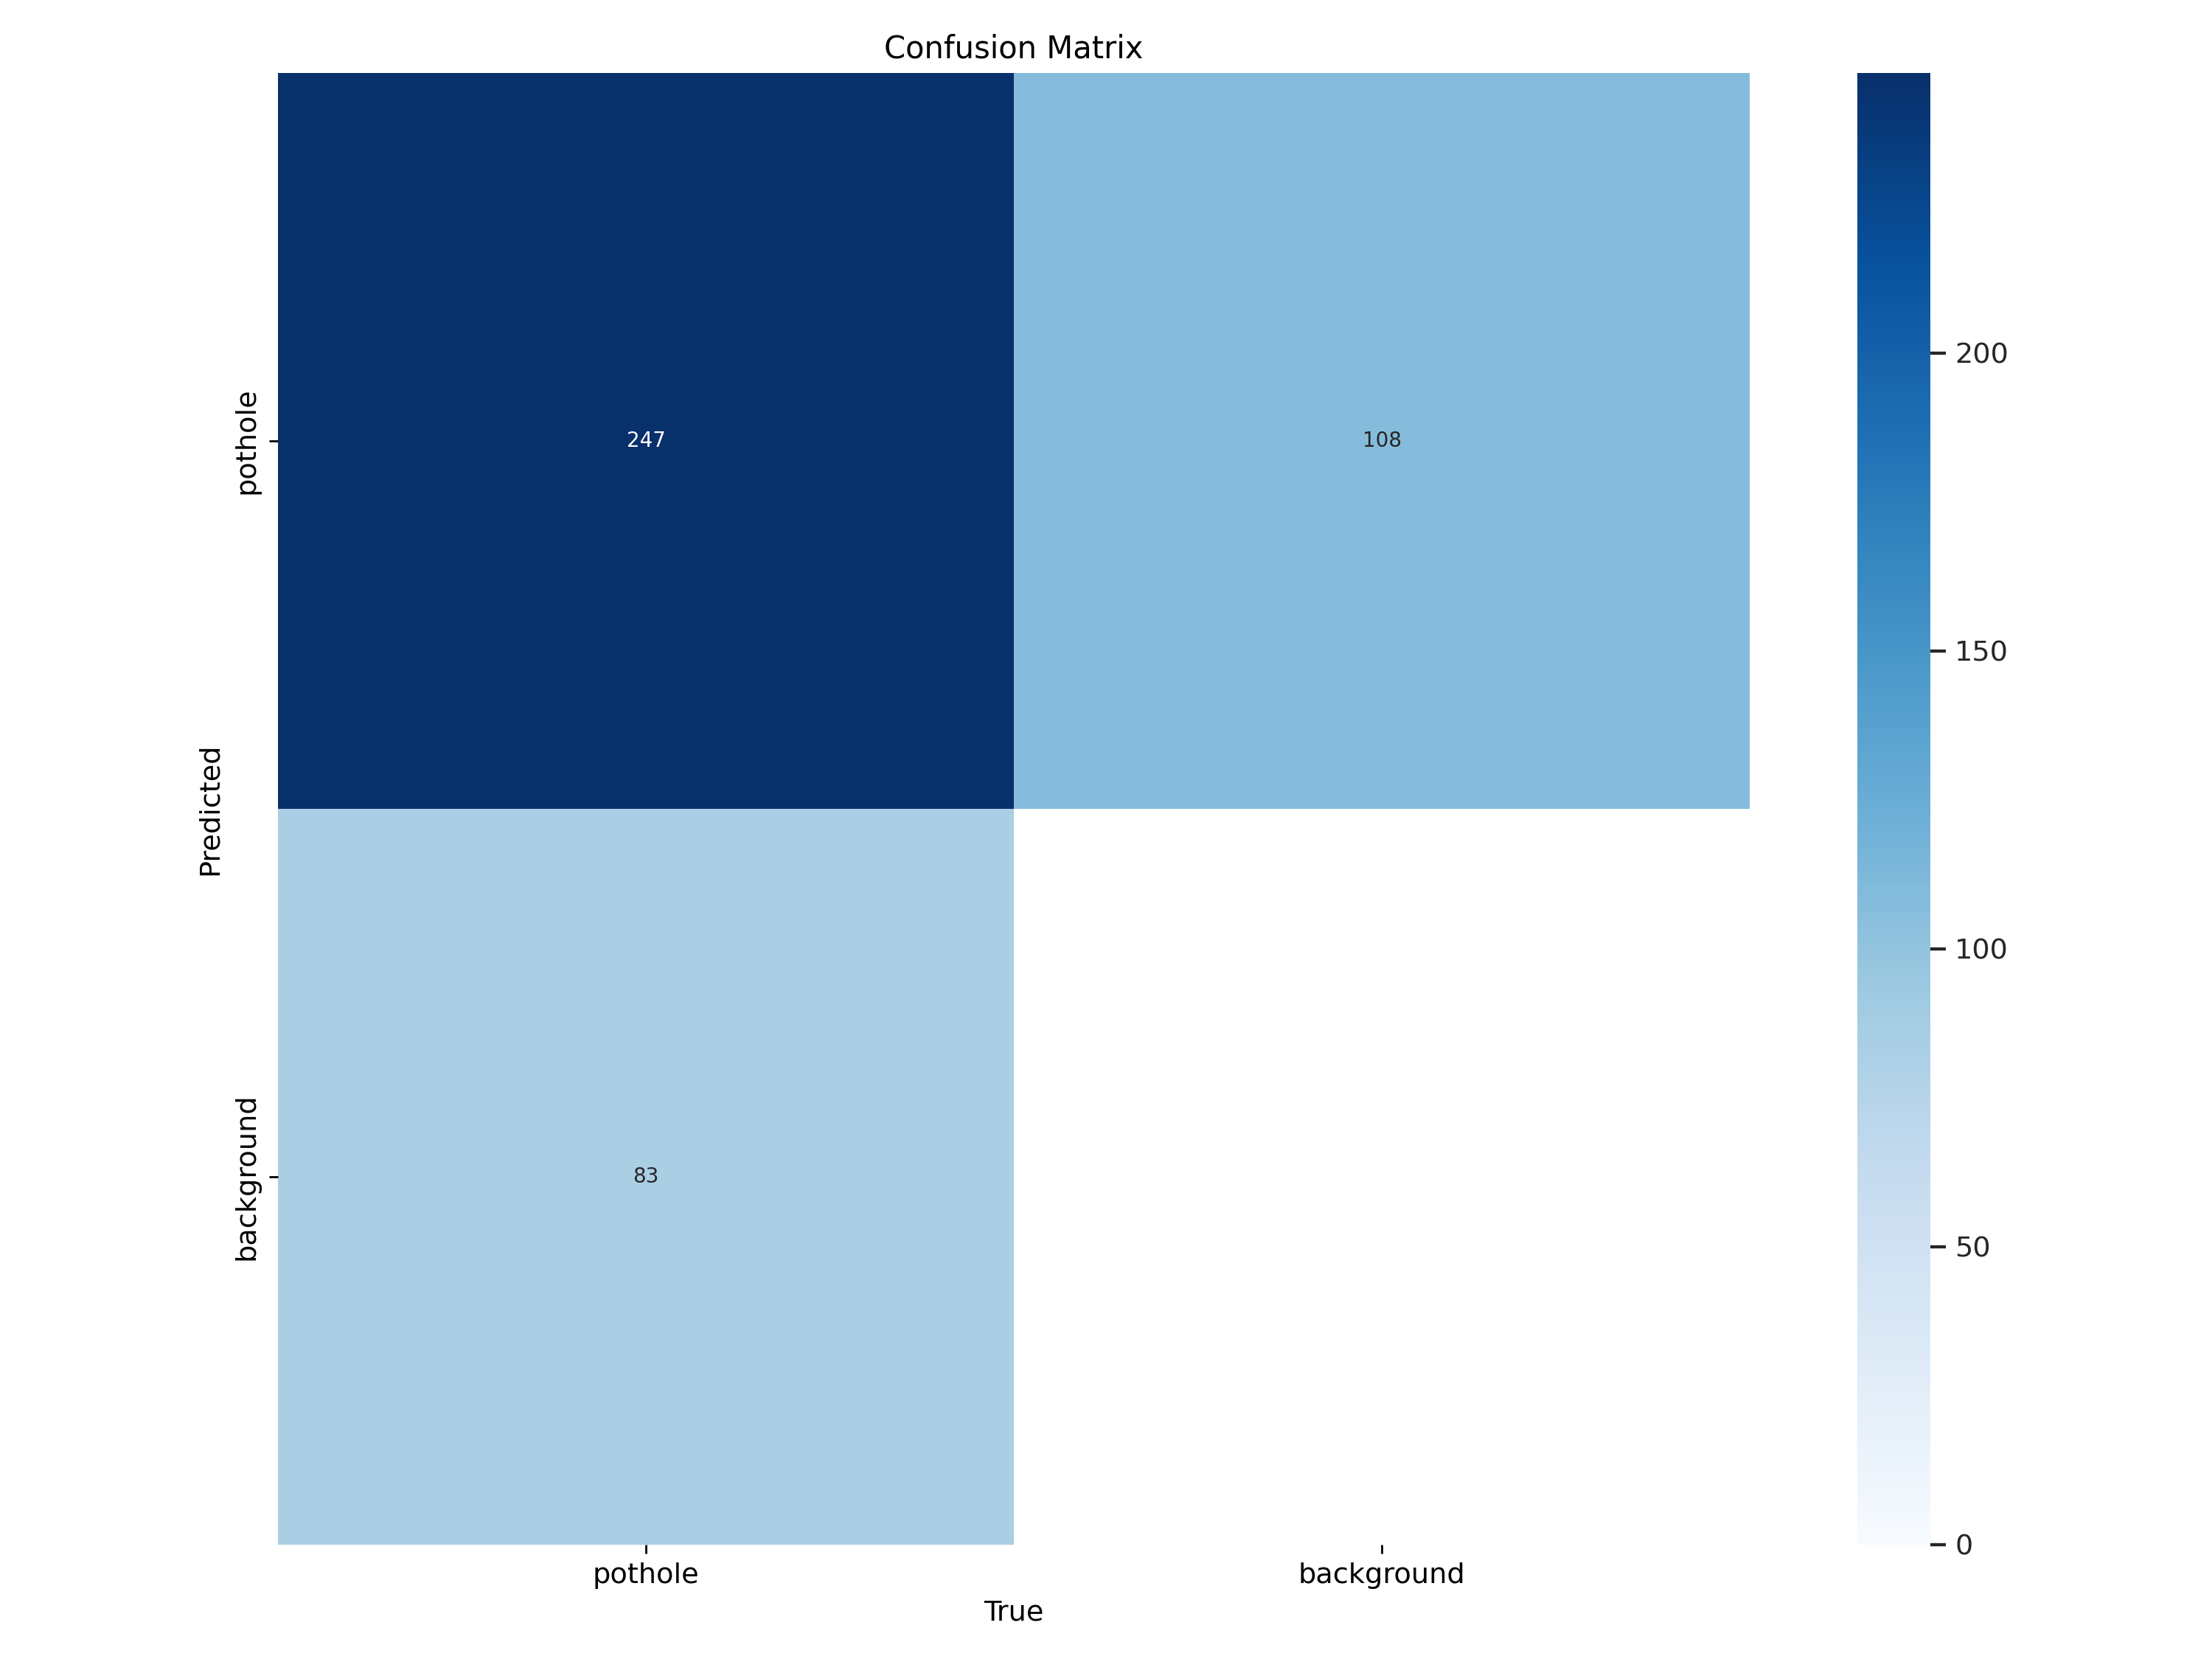

In [11]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

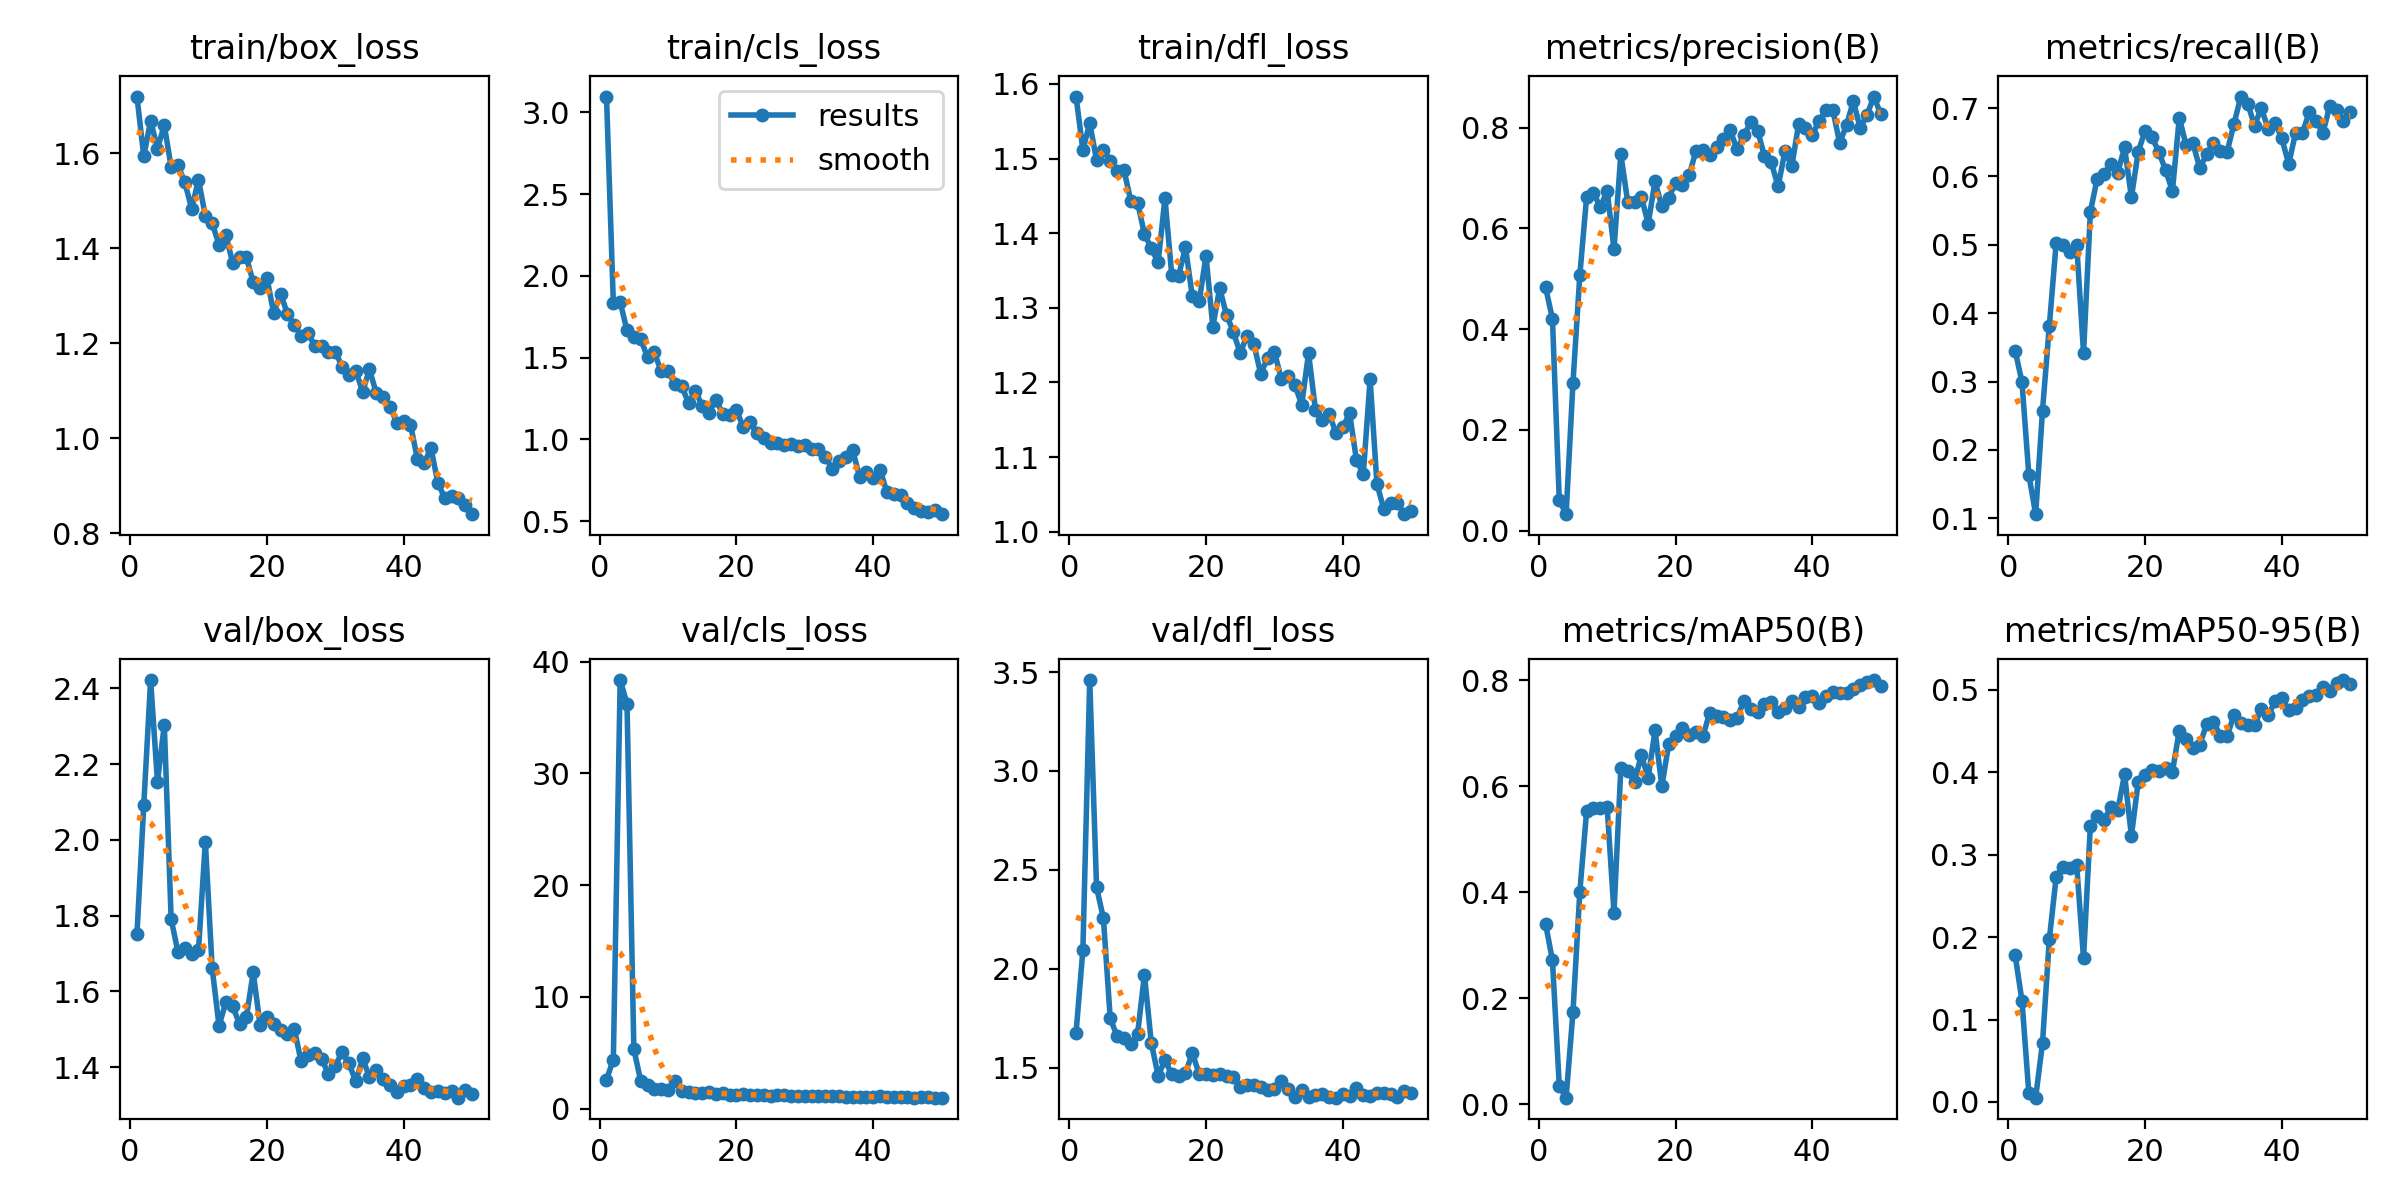

In [12]:
Image(filename='runs/detect/train/results.png', width=600)

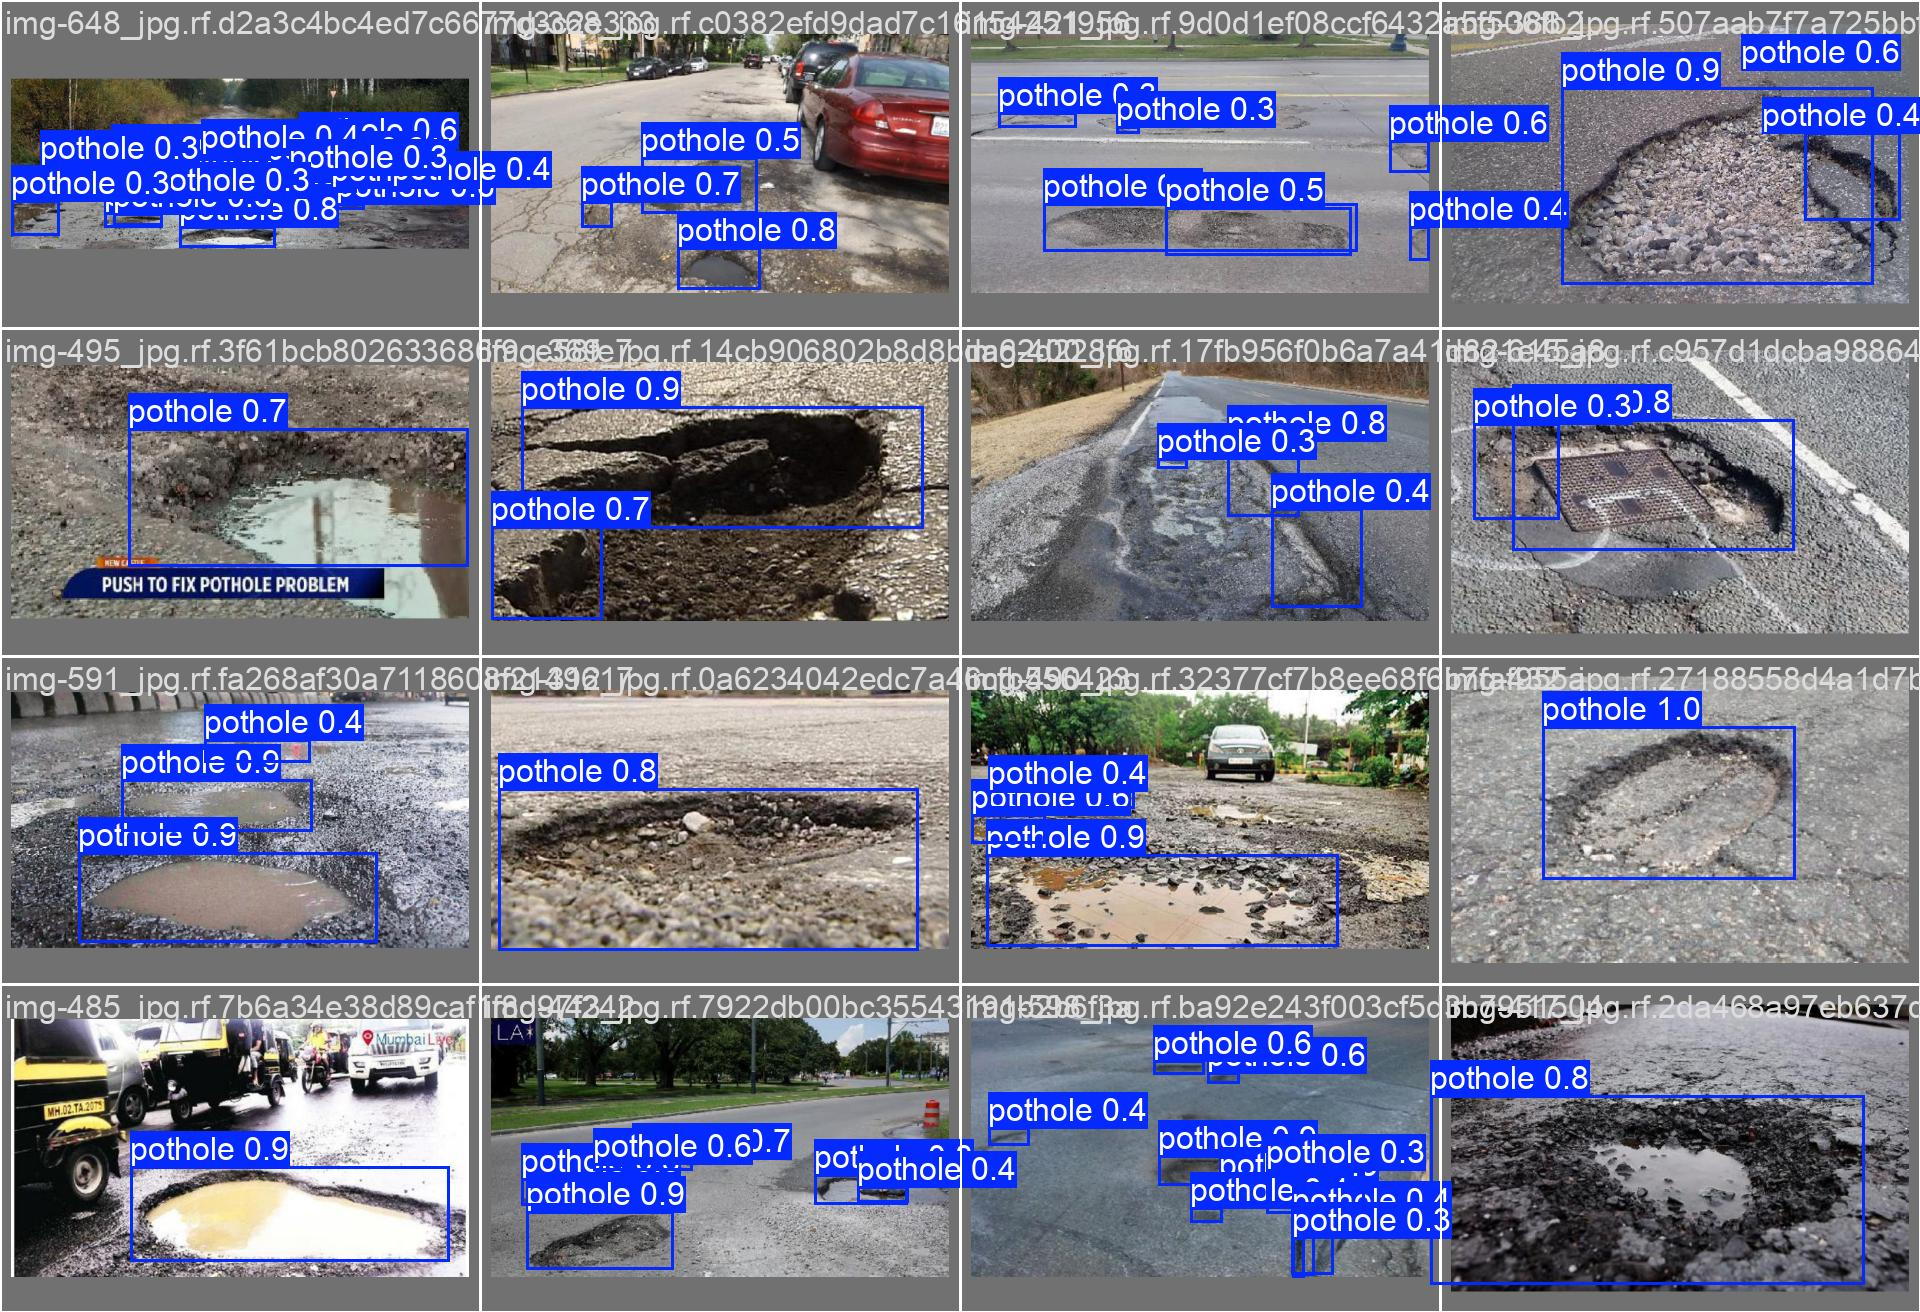

In [13]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 1.3±1.8 ms, read: 18.3±18.1 MB/s, size: 80.1 KB)
val: Scanning /content/drive/MyDrive/YOLOv8/Pothole.v1-raw.yolov8/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  2.05it/s]
                   all        133        330      0.829      0.694      0.793      0.516
Speed: 5.4ms preprocess, 12.6ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/1.jpeg: 192x224 2 Goggless, 3 Glovess, 14.6ms
image 2/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/10.jpeg: 160x224 2 Glovess, 14.5ms
image 3/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/11.jpeg: 224x224 3 Glovess, 10.4ms
image 4/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/12.jpeg: 192x224 3 Glovess, 12.3ms
image 5/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/13.jpeg: 128x224 1 Gloves, 14.6ms
image 6/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/14(1).jpeg: 224x224 10.1ms
image 7/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/14.jpg: 192x224 2 Helmets, 1 Goggles, 1 Gloves, 9.5ms
image 8/31 /content/drive/MyDrive/My Courses/YOLOv8/data/test/images/15.jpeg: 224x2

**NOTE:** Let's take a look at few results.

Enter 'upload' to upload an image or 'cam' for webcam: upload


Saving images.jpeg to images (1).jpeg

image 1/1 /content/drive/MyDrive/YOLOv8/images (1).jpeg: 384x640 2 potholes, 47.0ms
Speed: 2.0ms preprocess, 47.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


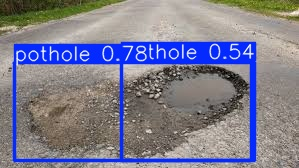


Detections:
  - pothole (0.78) | W: 239.1px, H: 98.7px | Rel Diag: 0.754 => Severity: High
  - pothole (0.54) | W: 129.9px, H: 99.0px | Rel Diag: 0.476 => Severity: High


In [52]:
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display, Javascript
from google.colab.output import eval_js
import cv2
import math
import glob
import os
from PIL import Image as PILImage
import uuid

# Load model
model = YOLO('runs/detect/train/weights/best.pt')

def capture_image():
    # JavaScript to capture webcam image
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📷 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize video
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Create canvas
            const canvas = document.createElement('canvas');
            capture.onclick = () => {
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);
                stream.getTracks().forEach(track => track.stop());
                div.remove();
                const dataUrl = canvas.toDataURL('image/jpeg', 1.0);
                google.colab.kernel.invokeFunction('notebook.capture_image', [dataUrl], {});
            };
        }
        takePhoto();
    ''')
    display(js)

def save_base64_image(data_url, filename='webcam.jpg'):
    import base64
    header, encoded = data_url.split(",", 1)
    with open(filename, "wb") as f:
        f.write(base64.b64decode(encoded))
    return filename

# Register JS callback
from google.colab import output
output.register_callback('notebook.capture_image', on_capture)
def on_capture(data_url):
    global captured_image_path
    captured_image_path = save_base64_image(data_url, f"captured_{uuid.uuid4().hex}.jpg")

# UI: Ask user
mode = input("Enter 'upload' to upload an image or 'cam' for webcam: ").strip().lower()

if mode == 'upload':
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
elif mode == 'cam':
    capture_image()
    print("📸 Waiting for you to take a picture...")
    import time
    while 'captured_image_path' not in globals():
        time.sleep(1)
    image_path = captured_image_path
else:
    raise ValueError("Invalid mode. Use 'upload' or 'cam'.")

# Open image for dimensions
img = PILImage.open(image_path)
image_width, image_height = img.size
image_diag = math.sqrt(image_width**2 + image_height**2)

# Run YOLOv8 detection
results = model(image_path, save=True, conf=0.25, imgsz=640)
output_dir = results[0].save_dir
saved_image_path = glob.glob(os.path.join(output_dir, '*.jpg'))[0]
display(Image(filename=saved_image_path))

# Print results with severity
print("\nDetections:")
for r in results:
    for box in r.boxes:
        cls = model.names[int(box.cls)]
        conf = float(box.conf)

        x1, y1, x2, y2 = box.xyxy[0].tolist()
        width = x2 - x1
        height = y2 - y1
        box_diag = math.sqrt(width**2 + height**2)
        relative_diag = box_diag / image_diag

        if relative_diag < 0.10:
            severity = 'Low'
        elif relative_diag < 0.20:
            severity = 'Medium'
        else:
            severity = 'High'

        print(f"  - {cls} ({conf:.2f}) | W: {width:.1f}px, H: {height:.1f}px | Rel Diag: {relative_diag:.3f} => Severity: {severity}")


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")